<a href="https://colab.research.google.com/github/jerondeepak/Project-ML/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.0572814 ]
 [ 1.9000725 ]
 [-0.68851537]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.38728786]
 [0.17774153]
 [0.16536689]], shape=(3, 1), dtype=float32)


In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [ ]:
x

array([[0., 1.],
       [1., 1.]])

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1559268 ],
       [-0.5148341 ],
       [ 0.40054175]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3, 1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0, 0].assign(3.)


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3, 1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [ ]:
print (a)
print (b)
print (c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
print (d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [ ]:
print (e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [ ]:
gradient 

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
print (input_const)

tf.Tensor(3.0, shape=(), dtype=float32)


In [ ]:
print(result)

tf.Tensor(9.0, shape=(), dtype=float32)


In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)


In [ ]:
print (position, time)

tf.Tensor(0.0, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


In [ ]:
print (speed)

tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
print (acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [ ]:
negative_samples

array([[-0.2897858 ,  3.80834225],
       [-0.2870049 ,  1.79301052],
       [-0.06360817,  2.72526964],
       ...,
       [ 1.00135691,  3.27037793],
       [ 1.10989287,  3.85851222],
       [ 0.15388851,  2.43947451]])

In [ ]:
positive_samples

array([[ 3.30618702, -1.08230481],
       [ 2.6064679 , -0.86990453],
       [ 1.8801817 , -0.20187385],
       ...,
       [ 3.0309918 , -0.21937523],
       [ 3.54438791, -0.96460769],
       [ 3.00546399, -0.26070117]])

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)


In [ ]:
inputs

array([[-0.2897858 ,  3.8083422 ],
       [-0.2870049 ,  1.7930105 ],
       [-0.06360817,  2.7252696 ],
       ...,
       [ 3.0309918 , -0.21937522],
       [ 3.5443878 , -0.9646077 ],
       [ 3.005464  , -0.26070118]], dtype=float32)

In [ ]:
inputs.shape

(2000, 2)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

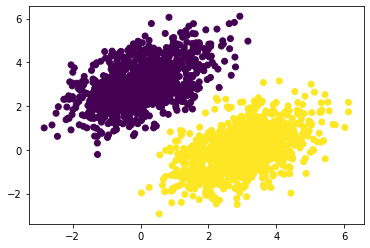

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.4788
Loss at step 1: 0.8151
Loss at step 2: 0.2374
Loss at step 3: 0.1531
Loss at step 4: 0.1337
Loss at step 5: 0.1233
Loss at step 6: 0.1148
Loss at step 7: 0.1071
Loss at step 8: 0.1002
Loss at step 9: 0.0938
Loss at step 10: 0.0879
Loss at step 11: 0.0825
Loss at step 12: 0.0776
Loss at step 13: 0.0731
Loss at step 14: 0.0690
Loss at step 15: 0.0653
Loss at step 16: 0.0618
Loss at step 17: 0.0587
Loss at step 18: 0.0558
Loss at step 19: 0.0532
Loss at step 20: 0.0507
Loss at step 21: 0.0485
Loss at step 22: 0.0465
Loss at step 23: 0.0447
Loss at step 24: 0.0430
Loss at step 25: 0.0414
Loss at step 26: 0.0400
Loss at step 27: 0.0387
Loss at step 28: 0.0375
Loss at step 29: 0.0364
Loss at step 30: 0.0354
Loss at step 31: 0.0345
Loss at step 32: 0.0337
Loss at step 33: 0.0329
Loss at step 34: 0.0322
Loss at step 35: 0.0316
Loss at step 36: 0.0310
Loss at step 37: 0.0305
Loss at step 38: 0.0300
Loss at step 39: 0.0295


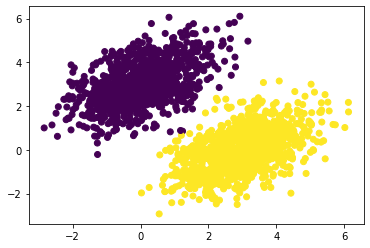

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

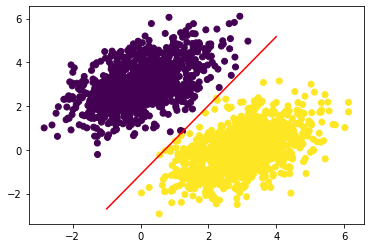

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)


Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 3.6112 - binary_accuracy: 0.9965
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 3.3937 - binary_accuracy: 0.9965
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 3.2132 - binary_accuracy: 0.9965
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 3.0393 - binary_accuracy: 0.9965
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 2.8721 - binary_accuracy: 0.9960


In [ ]:
history.history


{'binary_accuracy': [0.9965000152587891,
  0.9965000152587891,
  0.9965000152587891,
  0.9965000152587891,
  0.9959999918937683],
 'loss': [3.611158609390259,
  3.3936703205108643,
  3.21315860748291,
  3.0392720699310303,
  2.8720898628234863]}

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1145 - binary_accuracy: 0.9543 - val_loss: 0.0382 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0765 - binary_accuracy: 0.9514 - val_loss: 0.0577 - val_binary_accuracy: 0.9733
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0734 - binary_accuracy: 0.9529 - val_loss: 0.0366 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0744 - binary_accuracy: 0.9550 - val_loss: 0.0534 - val_binary_accuracy: 0.9883
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0751 - binary_accuracy: 0.9457 - val_loss: 0.0498 - val_binary_accuracy: 0.9850


In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.23889464]
 [-0.11981356]
 [ 0.89958525]
 [-0.17635643]
 [-0.28102976]
 [ 0.18298346]
 [ 0.8718748 ]
 [-0.2679668 ]
 [ 0.7471094 ]
 [-0.14622033]]
